In [ ]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, BatchNormalization
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.metrics import Metric
from keras import optimizers
import numpy as np
from keras.layers.core import Lambda
from keras import backend as K
from keras import regularizers
import matplotlib.pyplot as plt 

In [ ]:
# REFERENCED FROM https://github.com/fchollet/deep-learning-models/blob/master/vgg16.py

In [ ]:
num_classes=100

In [ ]:
from keras.datasets import cifar100
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

169009152/169001437 [==============================] - 6s 0us/step


In [ ]:
x_shape = x_train[0].shape

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('elu'))
model.add(BatchNormalization())

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
batch_size = 128
maxepoches = 100
learning_rate = 0.01
lr_decay = 1e-6
lr_drop = 20

def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

#checkpoint_path = "/content/gdrive/My Drive/checkpoint/VGG16_SGD_NoRegularization.ckpt"
#cp_callbacks = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True,verbose=1)
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images


#optimization details
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])


# training process in a for loop with learning rate drop every 25 epoches.

history = model.fit(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=maxepoches,
                    validation_data=(x_test, y_test),callbacks=[reduce_lr,callback],verbose=2)
model.save_weights("/content/gdrive/My Drive/checkpoint/VGG16_SGD_BatchNormalization.ckpt")

Epoch 1/100
390/390 - 32s - loss: 3.4881 - accuracy: 0.1751 - val_loss: 3.7590 - val_accuracy: 0.1334
Epoch 2/100
390/390 - 31s - loss: 2.7068 - accuracy: 0.3094 - val_loss: 2.9164 - val_accuracy: 0.2745
Epoch 3/100
390/390 - 32s - loss: 2.3021 - accuracy: 0.3909 - val_loss: 2.2721 - val_accuracy: 0.4040
Epoch 4/100
390/390 - 31s - loss: 2.0340 - accuracy: 0.4482 - val_loss: 2.1850 - val_accuracy: 0.4202
Epoch 5/100
390/390 - 31s - loss: 1.8308 - accuracy: 0.4976 - val_loss: 2.0261 - val_accuracy: 0.4607
Epoch 6/100
390/390 - 31s - loss: 1.6862 - accuracy: 0.5326 - val_loss: 2.0192 - val_accuracy: 0.4717
Epoch 7/100
390/390 - 32s - loss: 1.5470 - accuracy: 0.5625 - val_loss: 1.8949 - val_accuracy: 0.5029
Epoch 8/100
390/390 - 32s - loss: 1.4185 - accuracy: 0.5937 - val_loss: 1.9659 - val_accuracy: 0.4880
Epoch 9/100
390/390 - 32s - loss: 1.3209 - accuracy: 0.6197 - val_loss: 1.8604 - val_accuracy: 0.5193
Epoch 10/100
390/390 - 32s - loss: 1.2254 - accuracy: 0.6405 - val_loss: 1.8588 - 

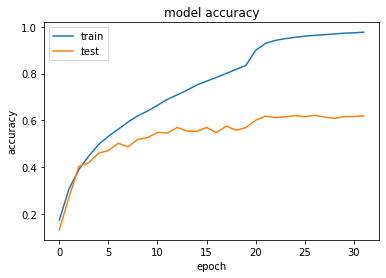

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

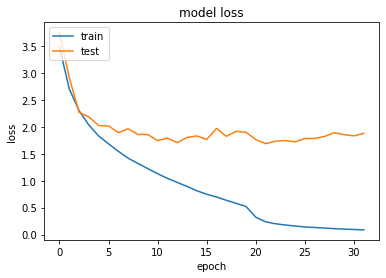

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pandas as pd
from keras.datasets import cifar100
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_test = x_test.astype('float32')
x_test = x_test / 255.0
y_pred = model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
y_pred=pd.DataFrame(y_pred)
y_test=pd.DataFrame(y_test)

p=precision_score(y_test, y_pred,average='weighted',labels=np.unique(y_pred))
r=recall_score(y_test,y_pred,average='micro',labels=np.unique(y_pred))
print('Precision Is:',p)
print('Recall Is:',r)

Precision Is: 0.6365162586993016
Recall Is: 0.6197
